<a href="https://colab.research.google.com/github/abisanthosh16/titanic_survival_exploration/blob/master/Titanic_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier



In [48]:
df=pd.read_csv('Titanic.csv')
df.head(10)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Frae,Cabin,Embarked
0,NaN,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,NaN,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,NaN,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,NaN,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,NaN,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,NaN,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,NaN,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,NaN,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,NaN,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,NaN,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [49]:
df.describe()

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Frae
count,0.0,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,NaN,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,NaN,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,NaN,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,NaN,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,NaN,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,NaN,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,NaN,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


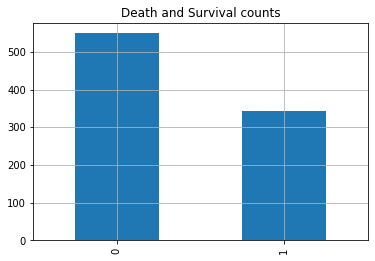

In [50]:
df['Survived'].value_counts().plot(kind='bar', title='Death and Survival counts',grid=True)
plt.show()

From this,we infer that majority of people did not survive the accident.

<function matplotlib.pyplot.show>

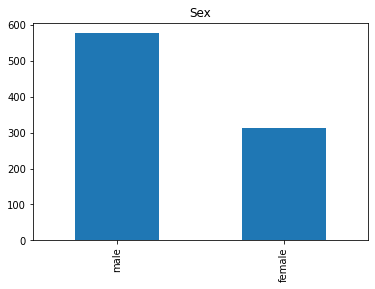

In [51]:
df['Sex'].value_counts().plot(kind='bar',title='Sex')
plt.show

It can be infered that the majority of people in the ship were male.

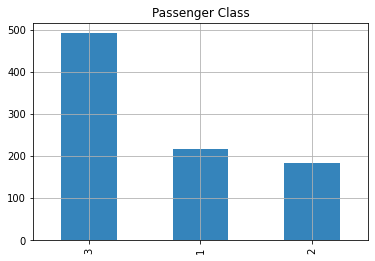

In [52]:
df['Pclass'].value_counts().plot(kind='bar',title='Passenger Class',alpha=0.90,grid=True)
plt.show()

It can be infered that the largest number of passengers were in class 3 followed by class 1 and class 2.

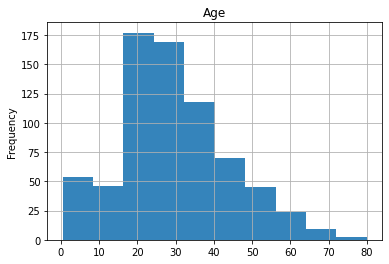

In [53]:
df['Age'].plot(kind='hist',title='Age',alpha=0.90,grid=True)
plt.show()


It can be infered that majority of passengers were in the age group 15-30 years.

Feature 1 : Passenger class

In [54]:
rel_l=pd.crosstab(df['Pclass'],df['Survived'])
print(rel_l)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


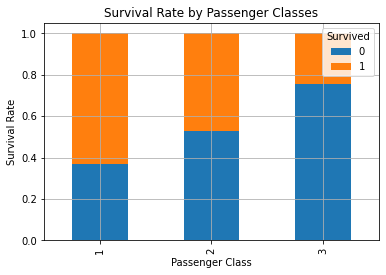

In [55]:
rel_l=pd.crosstab(df['Pclass'],df['Survived'])
rel_l_normalize = rel_l.div(rel_l.sum(1).astype(float),axis=0)
rel_l_normalize.plot(kind='bar',title='Survival Rate by Passenger Classes',stacked=True,grid=True)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

Those in First Class has the highest chance for survival.

Feature 2 : Sex

We'll need to map Sex from a string to a number to prepare it for machine learning algorithms

In [ ]:
rel_l=pd.crosstab(df['Sex'],df['Survived'])
print(rel_l)

Survived    0   1
Sex              
female     91  61
male      171  95


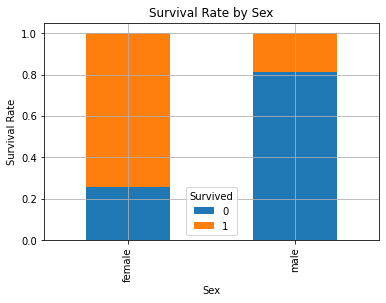

In [56]:
rel_2=pd.crosstab(df['Sex'],df['Survived'])
rel_2_normalize = rel_2.div(rel_2.sum(1).astype(float),axis=0)
rel_2_normalize.plot(kind='bar',title='Survival Rate by Sex',stacked=True,grid=True)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

The majority of females survived, whereas the majority of males did not.

Count males and females in each Pclass:

In [57]:
# Get the unique value of Pclass:
passenger_classes = sorted(df['Pclass'].unique())
passenger_classes

[1, 2, 3]

In [58]:
for i in passenger_classes:
  print('M :',i, len(df[(df['Sex']=='male') & (df['Pclass']==i)]))
  print('F :',i, len(df[(df['Sex']=='female') & (df['Pclass']==i)]))
  male=df[df['Sex']=='male']
  female=df[df['Sex']=='female']
  

M : 1 122
F : 1 94
M : 2 108
F : 2 76
M : 3 347
F : 3 144


Plot survival rate by Sex and Pclass:

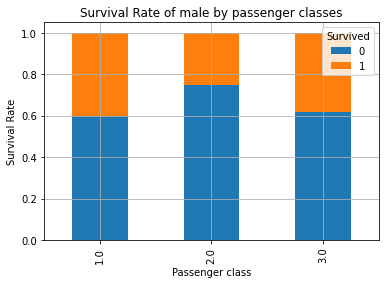

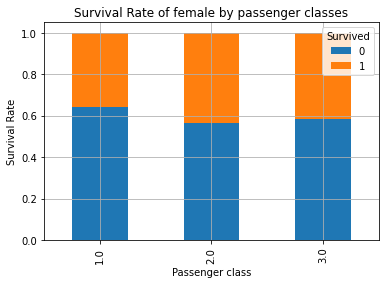

In [17]:
male_rel=pd.crosstab(male['Pclass'],male['Survived'])
male_rel_normalize = male_rel.div(male_rel.sum(1).astype(float),axis=0)
male_rel_normalize.plot(kind='bar',title='Survival Rate of male by passenger classes',stacked=True,grid=True)
plt.xlabel('Passenger class')
plt.ylabel('Survival Rate')
plt.show()
female_rel=pd.crosstab(female['Pclass'],female['Survived'])
female_rel_normalize = female_rel.div(female_rel.sum(1).astype(float),axis=0)
female_rel_normalize.plot(kind='bar',title='Survival Rate of female by passenger classes',stacked=True,grid=True)
plt.xlabel('Passenger class')
plt.ylabel('Survival Rate')
plt.show()

Feature 3 : Embarked

In [61]:
df[df['Embarked'].isnull()].head(10)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Frae,Cabin,Embarked,Embarked_Value
61,NaN,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,NaN
829,NaN,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,NaN


Thus we can see that the Embarked Column is missing certain values, which have to be filled otherwise it may cause problems during the machine learning algorithms.

In [62]:
df['Embarked_value']=df['Embarked']
df.head(10)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Frae,Cabin,Embarked,Embarked_Value,Embarked_value
0,NaN,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.0,S
1,NaN,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,C
2,NaN,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.0,S
3,NaN,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0,S
4,NaN,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.0,S
5,NaN,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,2.0,Q
6,NaN,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,3.0,S
7,NaN,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3.0,S
8,NaN,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,3.0,S
9,NaN,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1.0,C


We make a new column 'Embarked_Value'and replace C,Q,S with 1,2,3 so that we can carry out our machine learning algorithms on it.

In [67]:
df['Embarked_Value']=df['Embarked']
df['Embarked_Value'].replace(['C','Q','S'],[1,2,3],inplace=True)
embarked_locs = sorted(df['Embarked_Value'].unique())

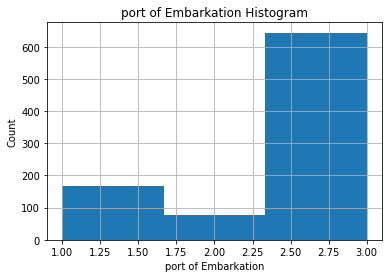

In [68]:
df['Embarked_Value'].plot(kind='hist',bins=3,range=(1,3),grid='True')
plt.title('port of Embarkation Histogram')
plt.xlabel('port of Embarkation')
plt.ylabel('Count')
plt.show()

Since the majority of passengers embarked in 'S': 3, we assign the missing values in Embarked to 'S':

In [69]:
df['Embarked_value']=df['Embarked_Value'].fillna(3)
embarked_locs = sorted(df['Embarked_Value'].unique())
embarked_locs

[1.0, 2.0, 3.0, nan]

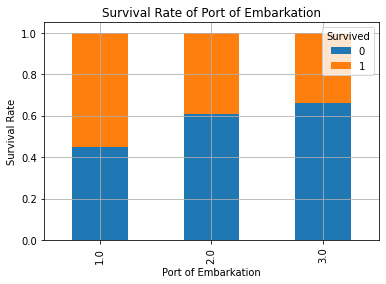

In [70]:
embarked_rel=pd.crosstab(df['Embarked_value'],df['Survived'])
embarked_rel_normalize = embarked_rel.div(embarked_rel.sum(1).astype(float),axis=0)
embarked_rel_normalize.plot(kind='bar',title='Survival Rate of Port of Embarkation',stacked='True',grid='True')
plt.xlabel('Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()

Feature 4 : Age

In [71]:
df[df['Age'].isnull()].head(10)

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Frae,Cabin,Embarked,Embarked_Value,Embarked_value
5,NaN,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,2.0,2.0
17,NaN,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,3.0,3.0
19,NaN,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1.0,1.0
26,NaN,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1.0,1.0
28,NaN,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,2.0,2.0
29,NaN,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,3.0,3.0
31,NaN,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1.0,1.0
32,NaN,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,2.0,2.0
36,NaN,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,1.0,1.0
42,NaN,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C,1.0,1.0


Here also many ages are missing. So we assign the missing ages the median values of the age according to their sex and passenger class.

In [72]:
df['Age_complete'] = df['Age']
df['Age_complete']=df['Age_complete'].groupby([df['Sex'],df['Pclass']]).apply(lambda x: x.fillna(x.median()))
df['Age_complete'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    25.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age_complete, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


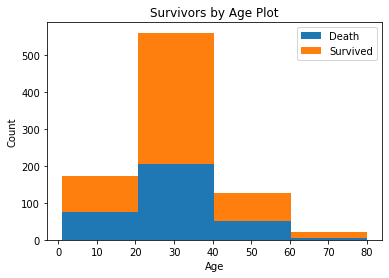

In [73]:
age_survived=df[df['Survived']==1]['Age_complete']
age_not_survived = df[df['Survived']==0]['Age_complete']
max_age = max(df['Age_complete'])

plt.hist([age_survived,age_not_survived],bins=4,range=(1, max_age), stacked=True)
plt.title('Survivors by Age Plot')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(('Death','Survived'), loc='best')
plt.show()

In [ ]:
for i in passenger_classes:
  df.Age_complete[df.Pclass==i].plot(kind='density')
  plt.title('Age,Density plots by passenger class')
  plt.xlabel('Age')
  plt.legend(('1st class','2nd class','3rd class'), loc='best')
  plt.show()

Thus we see the first class passengers were generally older then second class passengers, which in turn were older than third class passengers.

Feature 5 : Family size

We define a new feature family size that is the sum of Parch(number of parents or children or board) and SibSp(number of siblingd or spouses)

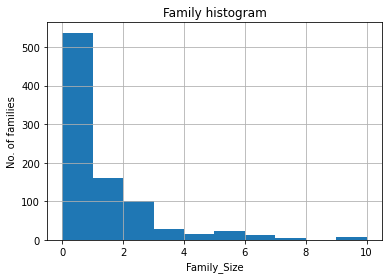

In [75]:
df['Family_Size'] = df['SibSp'] + df['Parch']
df['Family_Size'].hist(bins=10)
plt.xlabel('Family_Size')
plt.ylabel('No. of families')
plt.title('Family histogram')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


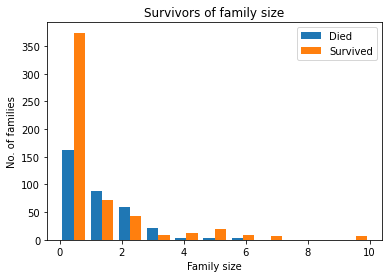

In [80]:
family_sizes=sorted(df['Family_Size'].unique())
family_sizes_max=max(family_sizes)
family_size_survived=df[df['Survived']==1]['Family_Size']
family_size_not_survived = df[df['Survived']==0]['Family_Size']
plt.hist([family_size_survived,family_size_not_survived],bins = family_sizes_max + 1, range=(0, family_sizes_max), stacked=False)
plt.legend(('Died','Survived'), loc='best')
plt.xlabel('Family size')
plt.ylabel('No. of families')
plt.title('Survivors of family size')
plt.show()

Data for Machine Learning

In [78]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]
df=df.drop(['Name','Sex','Ticket','Cabin','Embarked','SibSp','Parch','PassengerId','Age','Embarked_Value'],axis=1)
df.head(10)

,Unnamed: 0,Survived,Pclass,Frae,Embarked_value,Age_complete,Family_Size
0,NaN,0,3,7.2500,3.0,22.0,1
1,NaN,1,1,71.2833,1.0,38.0,1
2,NaN,1,3,7.9250,3.0,26.0,0
3,NaN,1,1,53.1000,3.0,35.0,1
4,NaN,0,3,8.0500,3.0,35.0,0
5,NaN,0,3,8.4583,2.0,25.0,0
6,NaN,0,1,51.8625,3.0,54.0,0
7,NaN,0,3,21.0750,3.0,2.0,4
8,NaN,1,3,11.1333,3.0,27.0,2
9,NaN,1,2,30.0708,1.0,14.0,1


In [79]:
def data_prep(df_given):
    # Get the unique values of Sex
    sexes = sorted(df_given['Sex'].unique())
    # Generate a mapping of Sex from a string to a number representation    
    genders_mapping = dict(zip(sexes, range(0, len(sexes) + 1)))
   # Transform Sex from a string to a number representation
    df_given['Sex_Val'] = df_given['Sex'].map(genders_mapping).astype(int)
        # Get the unique values of Embarked
    df_given['Embarked_Value']=df_given['Embarked']
    df_given['Embarked_Value'].replace(['C','Q','S'],[1,2,3],inplace=True)
    df_given['Embarked_Value']=df_given['Embarked_Value'].fillna(3)
   # embarked_locs = sorted(df_given['Embarked_Value'].unique())
    # Fill in missing values of Fare with the average Fare
    if len(df_given[df_given['Fare'].isnull()] > 0):
        avg_fare = df_given['Fare'].mean()
        df_given['Fare'].fillna(avg_fare, inplace=True)
    df_given['Age_complete'] = df_given['Age']
    df_given['Age_complete']=df_given['Age_complete'].groupby([df_given['Sex_Val'],df_given['Pclass']]).apply(lambda x: x.fillna(x.median()))
    df_given['Family_Size'] = df_given['SibSp'] + df_given['Parch']
    # Drop the columns we won't use:
    # Drop the Age column since we will be using the Age_omplete column instead.
    # Drop the SibSp and Parch columns since we will be using Family_Size.
    # Drop the PassengerId column since it won't be used as a feature.
    df_given=df_given.drop(['Name','Sex','Ticket','Cabin','Embarked','SibSp','Parch','PassengerId','Age','Embarked_Value'],axis=1)#axis=1 means columns
    #if drop_passenger_id:
     #   df_given = df_given.drop(['PassengerId'], axis=1)
    
    return df_given